In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Business Problem
In recent years, City hotel and Resort hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues like low revenues and no optimal use of hotel rooms. Consequently, lower cancellation rates is both hotels primary demand in order to increase their efficiency in generating revenue.


# Problem Statement

1. which type of customers( Bachlors, Families, Corporate people) cancel most times.
2. In which months of year cancellations occur most frequently.
3. Which type of agents bring customers which cancel most frequently.

## Hypothesis for Analysis
1. More cancellation occur when prices are higher.
2. When waiting list is longer than usual customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

In [2]:
data = pd.read_csv("hotel_bookings 2.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# 1. Data Cleaning

In [3]:
data.shape

(119390, 32)

In [4]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
data.describe(include= 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,21/10/2015
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [7]:
data.drop(['company', 'agent','meal','distribution_channel','total_of_special_requests'], axis = 1, inplace = True)
data.dropna(inplace=True)


In [8]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
reservation_status                0
reservation_status_date           0
dtype: int64

In [9]:
# treating the data types of columns 
data['children'] = data['children'].astype('int64')
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  int64  

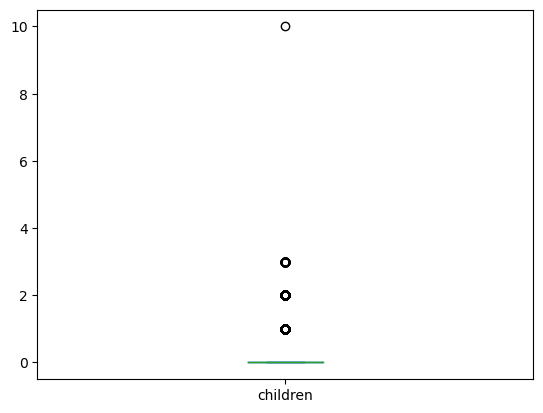

In [10]:
data['children'].plot(kind='box')
plt.show()



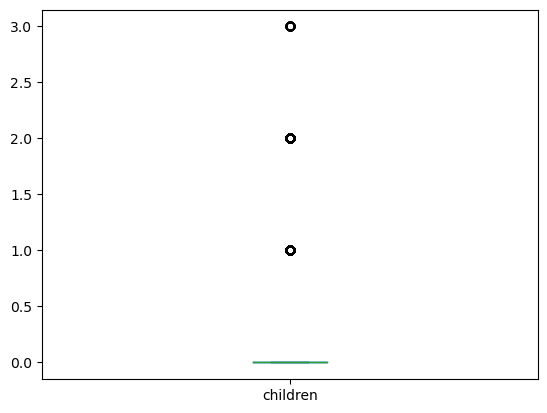

In [11]:
# we have outlier as 10 children so dropping it
data = data[data['children']<5]
data['children'].plot(kind='box')
plt.show()


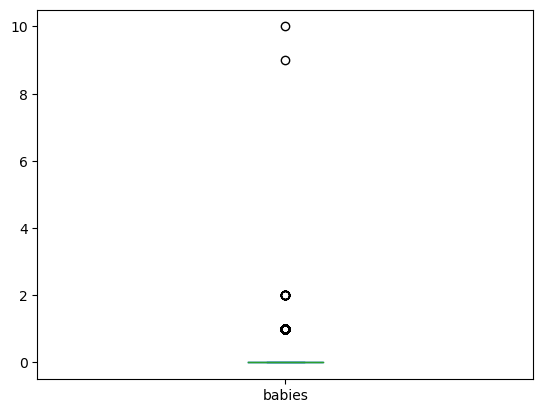

In [12]:
data['babies'].plot(kind='box')
plt.show()


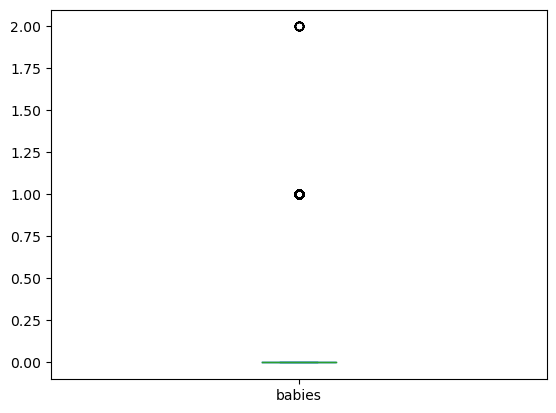

In [13]:
# we have outlier as more than 3 babies at a time so dropping it
data = data[data['babies']<3]
data['babies'].plot(kind='box')
plt.show()

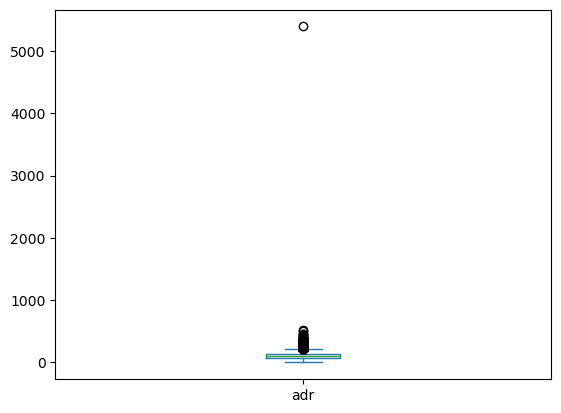

In [14]:
data['adr'].plot(kind='box')
plt.show()

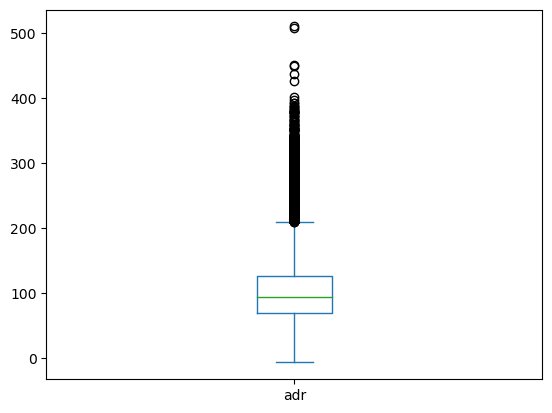

In [15]:
# we have outlier as adr more than 5000 so dropping it
data = data[data['adr']<5000]
data['adr'].plot(kind='box')
plt.show()

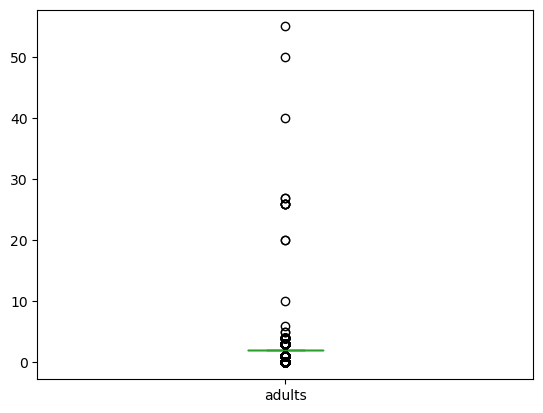

In [16]:
data['adults'].plot(kind='box')
plt.show()


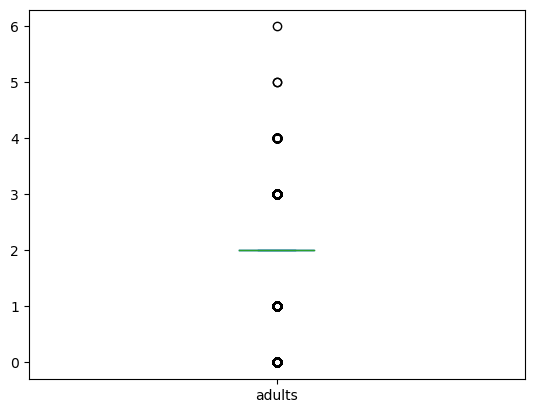

In [17]:
# we have outlier in adults column where more than 10 adults are less likely to book a hotel together generally, so dropping it 
#  as outlier to be more specific
data = data[data['adults']<10]
data['adults'].plot(kind='box')
plt.show()

 So far we have cleaned the data by removing the outliers and correcting the datatypes of certain columns for our analysis.

In [18]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'market_segment', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

## 2. Data Analysis and Visualization

In [19]:
# let's check the precentage of cancellations 
Cancel_perc = data['is_canceled'].value_counts(normalize= True)
Cancel_perc

0    0.628721
1    0.371279
Name: is_canceled, dtype: float64

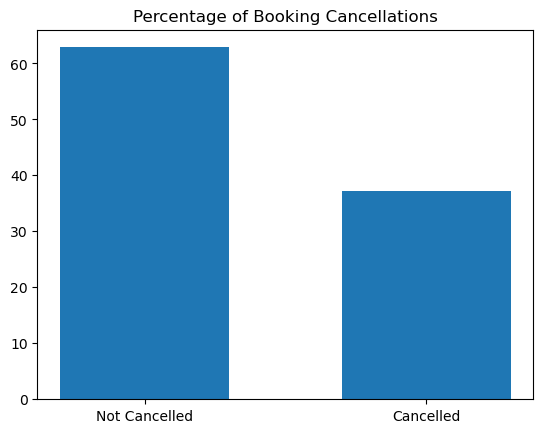

In [20]:
plt.bar(['Not Cancelled', 'Cancelled'],Cancel_perc*100, width=0.6)
plt.title("Percentage of Booking Cancellations")
plt.show()

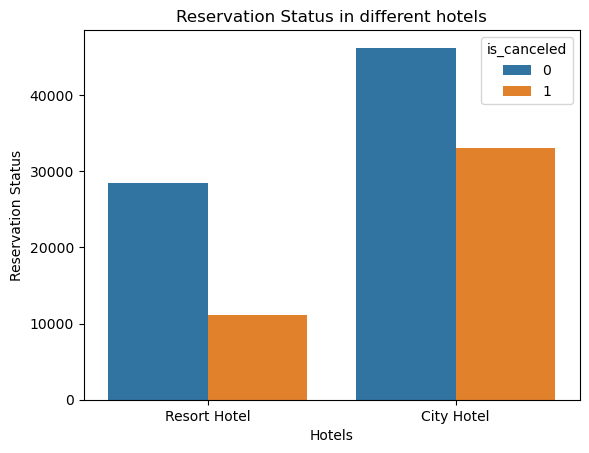

In [21]:
# now checking which hotel get higher cancellations.
sns.countplot(x='hotel',hue='is_canceled',data=data )
plt.title("Reservation Status in different hotels")
plt.xlabel("Hotels")
plt.ylabel("Reservation Status")
plt.show()

In [22]:
# now let's look at the % of cancellations in Resort hotel
resort_hotel = data[data['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.720504
1    0.279496
Name: is_canceled, dtype: float64

In [23]:
# now let's look at the % of cancellations in city hotel
City_hotel = data[data['hotel']=='City Hotel']
City_hotel['is_canceled'].value_counts(normalize=True)

0    0.582908
1    0.417092
Name: is_canceled, dtype: float64

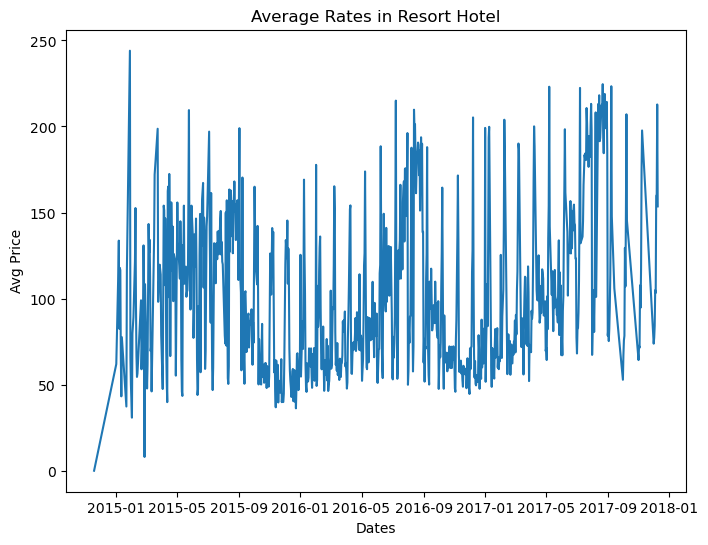

In [24]:
# now let's check the effect of price in resort hotel
resort_price = resort_hotel.groupby('reservation_status_date')['adr'].mean()
plt.figure(figsize=(8,6))
plt.plot(resort_price.index,resort_price)
plt.title('Average Rates in Resort Hotel')
plt.xlabel("Dates")
plt.ylabel("Avg Price")
plt.show()

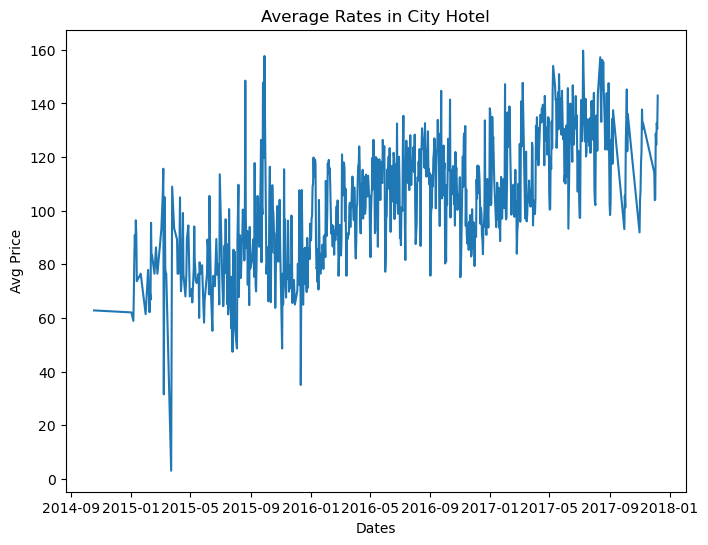

In [25]:
# now let's check the effect of price  in City hotel
City_price = City_hotel.groupby('reservation_status_date')['adr'].mean()
plt.figure(figsize=(8,6))
plt.plot(City_price.index,City_price)
plt.title('Average Rates in City Hotel')
plt.xlabel("Dates")
plt.ylabel("Avg Price")
plt.show()

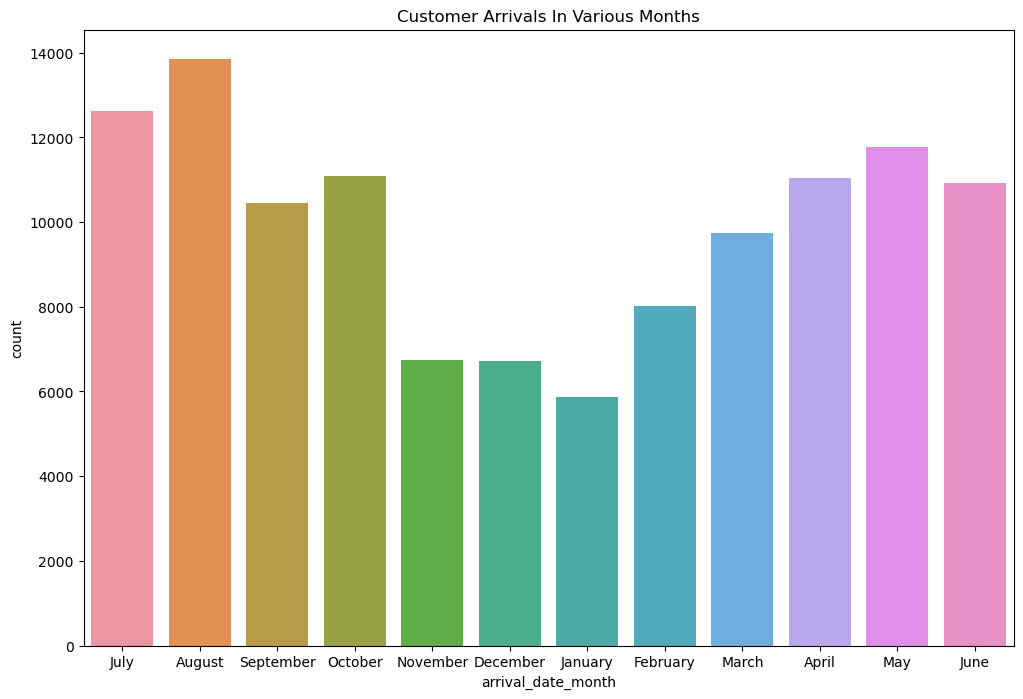

In [26]:
# now plotting graph to know which month gets highest visting of customers
plt.figure(figsize=(12,8))
sns.countplot(x='arrival_date_month',data=data )
plt.title("Customer Arrivals In Various Months")
plt.show()

By this graph 
1. we can say that July,August months see the highest number of arrivals in hotels .
2. whereas November, December and January see the lowest number of arrivals.


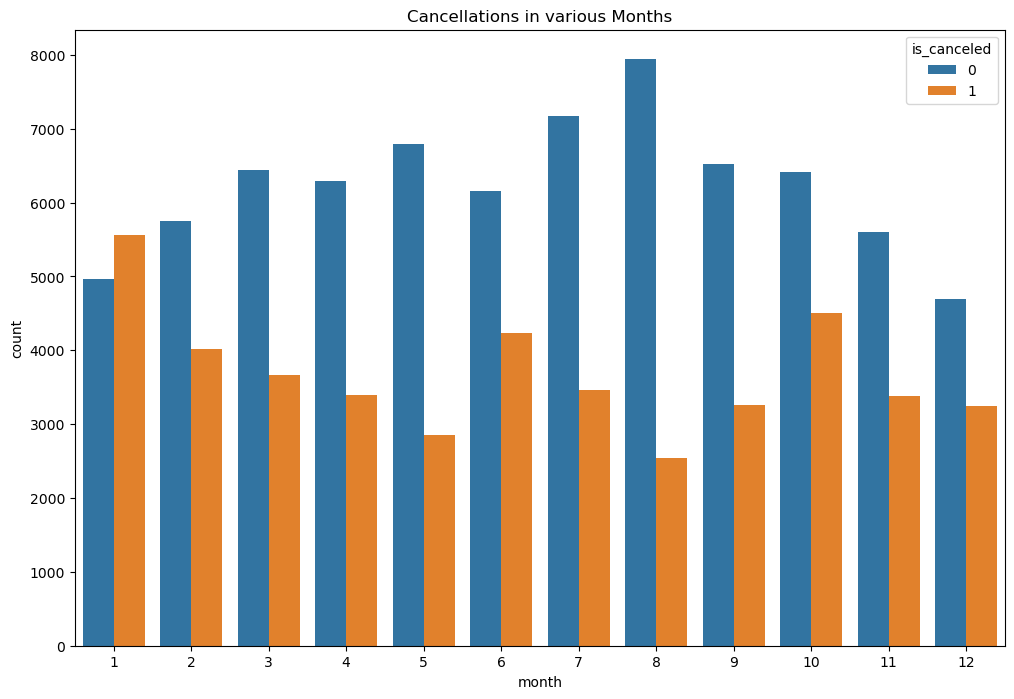

In [27]:
# now plotting graph to know which month gets highest cancellations
data['month'] = data['reservation_status_date'].dt.month
plt.figure(figsize=(12,8))
sns.countplot(x='month',hue='is_canceled',data=data )
plt.title("Cancellations in various Months")

plt.show()

By this visualization we can say
1. January sees the highest number of cancellations also october, November and December have significant nummber of cancellations.


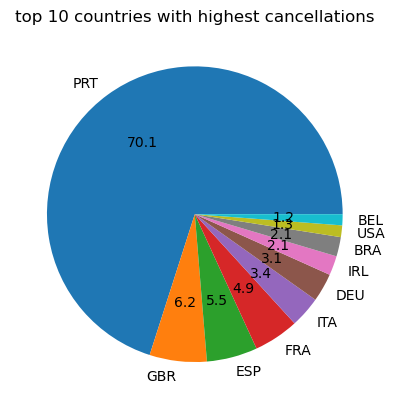

In [28]:
# now let's see which countries have highest cancellation rates.
canceled_booking = data[data['is_canceled']==1]
top_10_countries = canceled_booking['country'].value_counts()[:10]
plt.pie(top_10_countries,labels= top_10_countries.index,autopct='%.1f')
plt.title("top 10 countries with highest cancellations")
plt.show()

By this visualization we can say that the cancellations are very high in Portugal, so the hotels have to improve their facilities and have to run some marketing campaigns and discounts to attract customers.

In [29]:
# Now let's check from which platform customer do the bookings.
market_seg = data['market_segment'].value_counts(normalize=True)

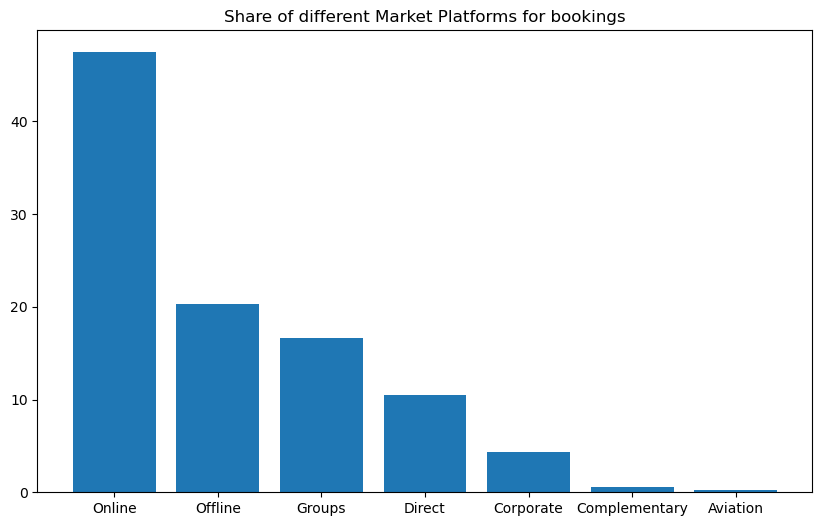

In [30]:
plt.figure(figsize= (10,6))
plt.bar(['Online','Offline','Groups','Direct','Corporate','Complementary','Aviation'],market_seg*100)
plt.title("Share of different Market Platforms for bookings")
plt.show()

In [31]:
# Now let's check from which platform customer do the cancellations.
canceled_booking['market_segment'].value_counts(normalize=True)

Online TA        0.469845
Groups           0.274072
Offline TA/TO    0.187390
Direct           0.043319
Corporate        0.022158
Complementary    0.002039
Aviation         0.001178
Name: market_segment, dtype: float64

By these two analysis we can say that online bookings are most common amonng the customers but cancellations are also high in online Which can be because the details of rooms and other facilities uploaded online do not match with reality so the customer tend to cancel more.

## Suggestions after Analysis
1. Although 63% of customers are not cancelling their bookings but 37% is a big ratio of cancellation in Hotel Business. So the hotels have to look into it seriously.
2. As per the Analysis the City Hotels specifically is seeing higher cancellation rates with higher bookings so they are having a larger set of problem with reveneu.
3. As the Months like July,August months see the highest number of arrivals in hotels the Stakeholder should be looking to increase their facilities by increasing Manpower for optimum satisfaction of customers.
4. Also during Months of November, December and January hotels see the lowest number of arrivals so they should run marketing campaigns and customer friendly offers to attract more arrivals.
5. January sees the highest number of cancellations may be because after winter vacations during new year the work load is very high on hotel staff so they cannot provide proper services.
6. At last we have seen in visualizations that Online mode of hotel booking sees highest cancellations may be because the details and photos uploaded on online platform differ from realties so customer tend to cancel more.

There can be other reasons as well for this business problem,But these the most appearing in our Analysis.
ThankYou!!